In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df=pd.read_csv('globalpower.csv')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Checking the shape of the dataset

In [5]:
df.shape

(908, 25)

There are 908 rows and 25 columns

checking null values

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [7]:
# checking NA
df.isna().sum()

# No null and no NA values

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [8]:
# Check the data types of the variables
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [9]:
#check the data
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


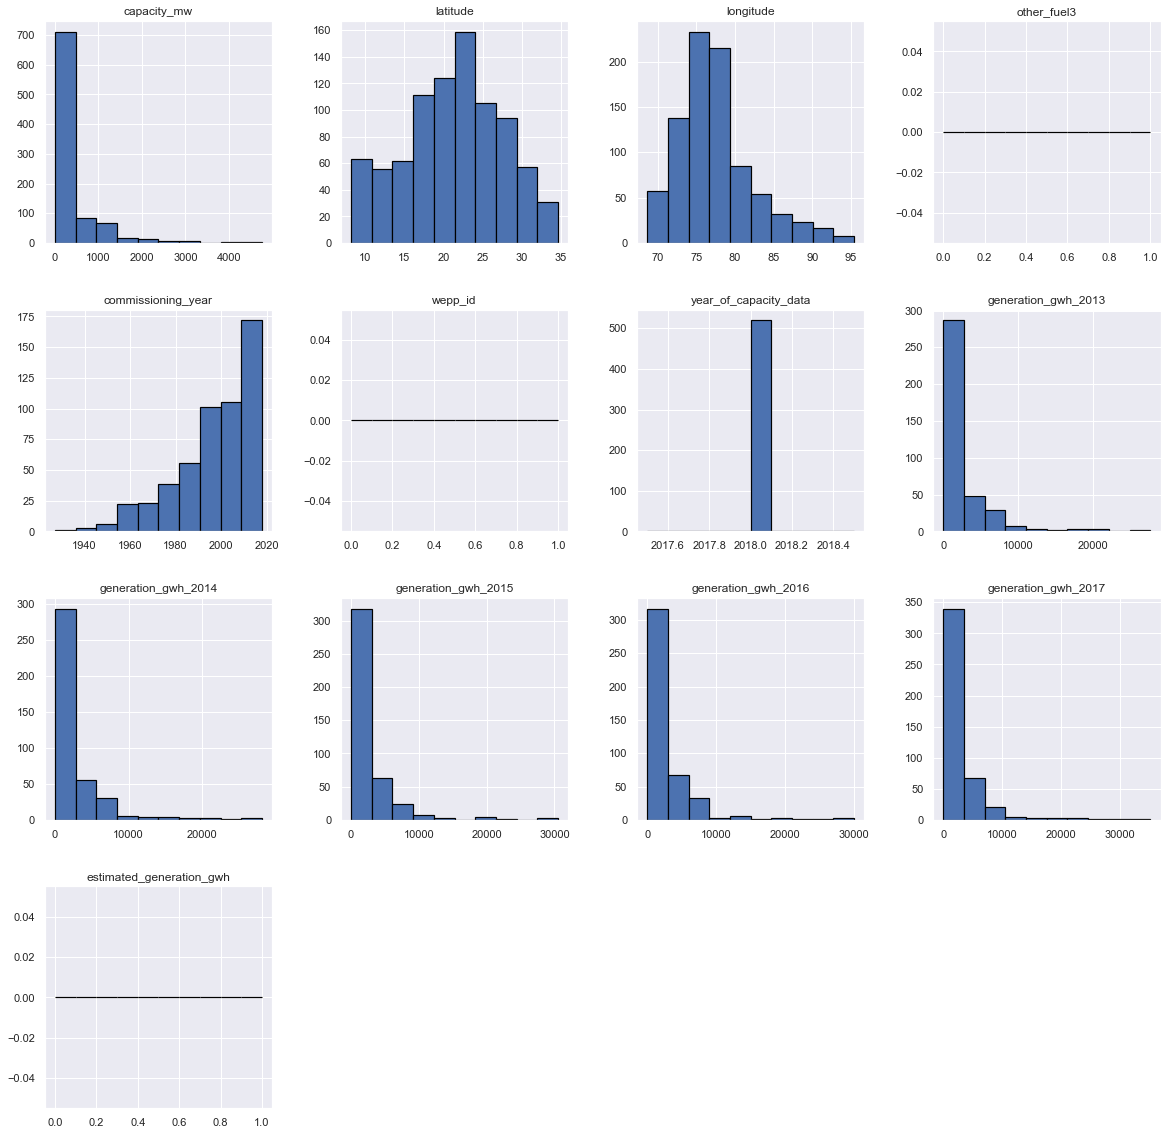

In [10]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [53]:
# Top teams based on different criteria
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='Economy (GDP per Capita)',y='Country',
                        data=df.nlargest(10,'Economy (GDP per Capita)'),
                        ax=axes[0,0],palette="Blues_r")
sns.barplot(x='Health (Life Expectancy)' ,y='Country',
                        data=df.nlargest(10,'Health (Life Expectancy)'),
                        ax=axes[0,1],palette='Blues_r')
sns.barplot(x='Happiness Score' ,y='Country',
                        data=df.nlargest(10,'Happiness Score'),
                        ax=axes[1,0],palette='Blues_r')
sns.barplot(x='Generosity' ,y='Country',
                        data=df.nlargest(10,'Generosity'),
                        ax=axes[1,1],palette='Blues_r')
sns.barplot(x='Freedom' ,y='Country',
                        data=df.nlargest(10,'Freedom'),
                        ax=axes[2,0],palette='Blues_r')
sns.barplot(x='Trust (Government Corruption)' ,y='Country',
                        data=df.nlargest(10,'Trust (Government Corruption)'),
                        ax=axes[2,1],palette='Blues_r')

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


<AxesSubplot:xlabel='Attrition', ylabel='count'>

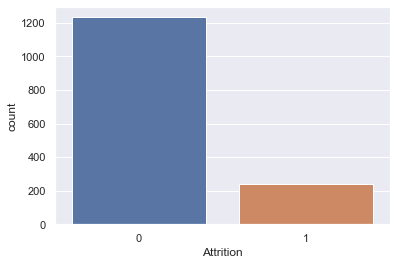

The target value is not balanced it is more towards "No"

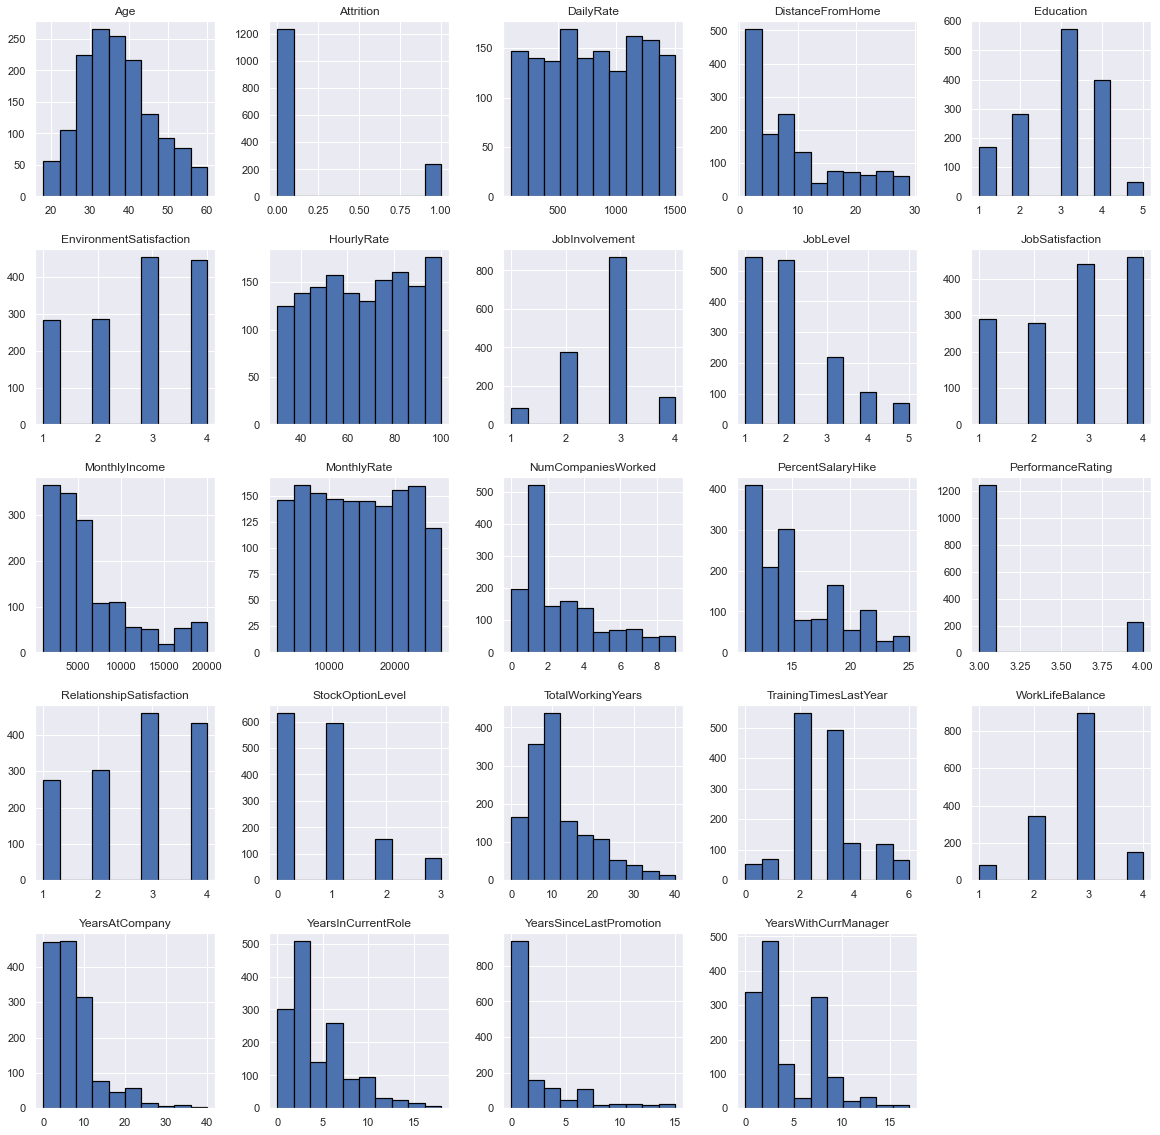

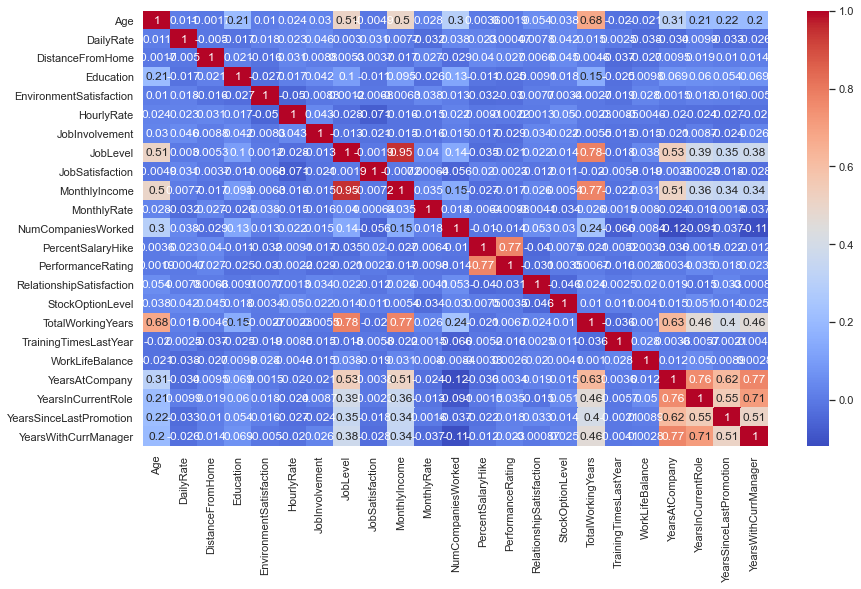

In [48]:
#Pearson Correlation
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.show()

In [49]:
#Variable separation

numerical_features = ['Age','DailyRate','DistanceFromHome', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel',
                       'JobSatisfaction', 
                       'RelationshipSatisfaction', 
                       'StockOptionLevel',
                        'TrainingTimesLastYear']

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = 'age'

In [50]:
# train test data split

train, test = train_test_split(df, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 1102
Test data points : 368


KeyError: 'age'

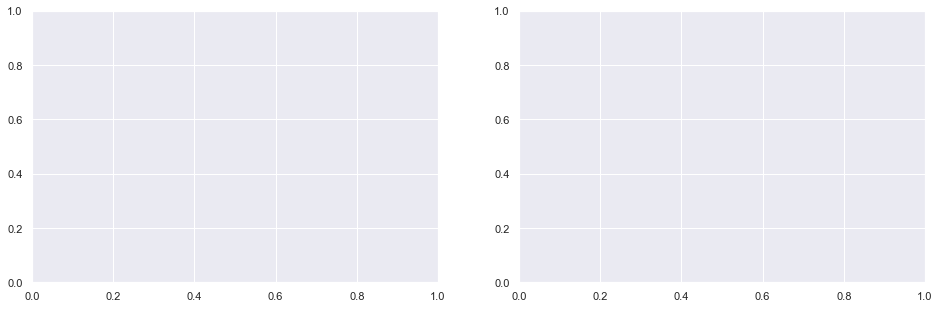

In [51]:
#Target distribution

fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

train[target].plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

test[target].plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

In [ ]:
#Distribution of the numerical features:

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'hist', ax=axes[i], title=c, color='blue', bins=30)
    
plt.tight_layout()
plt.show()

In [ ]:
#Box Plot to check outliers:

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

Most of the features contain outliers. Height feature has extreme outliers.

In [ ]:
# DISTRIBUTION OF ALL NUMERIC DATA
plt.rcParams['figure.figsize'] = (15, 15)
df1 = df[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
              'Generosity','Trust (Government Corruption)','Family']]
h = df1.hist(bins = 25, figsize = (16,16),
             xlabelsize = '10', ylabelsize = '10')
sns.despine(left = True, bottom = True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()]

In [ ]:
# Top Countries based on different criterias
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='Economy (GDP per Capita)',y='Country',
                        data=df.nlargest(10,'Economy (GDP per Capita)'),
                        ax=axes[0,0],palette="Blues_r")
sns.barplot(x='Health (Life Expectancy)' ,y='Country',
                        data=df.nlargest(10,'Health (Life Expectancy)'),
                        ax=axes[0,1],palette='Blues_r')
sns.barplot(x='Happiness Score' ,y='Country',
                        data=df.nlargest(10,'Happiness Score'),
                        ax=axes[1,0],palette='Blues_r')
sns.barplot(x='Generosity' ,y='Country',
                        data=df.nlargest(10,'Generosity'),
                        ax=axes[1,1],palette='Blues_r')
sns.barplot(x='Freedom' ,y='Country',
                        data=df.nlargest(10,'Freedom'),
                        ax=axes[2,0],palette='Blues_r')
sns.barplot(x='Trust (Government Corruption)' ,y='Country',
                        data=df.nlargest(10,'Trust (Government Corruption)'),
                        ax=axes[2,1],palette='Blues_r')

To create a model with all features

In [ ]:
def adjustedR2(R2,X,y):
    return (1 - (1-R2)*(len(y)-1)/(len(y)-X.shape[1]-1))

In [ ]:
# MULTIPLE LINEAR REGRESSION 1
train_data_dm,test_data_dm = train_test_split(df,train_size = 0.8,random_state=3)
independent_var = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
                   'Generosity','Trust (Government Corruption)','Family']
complex_model_1 = LinearRegression()
complex_model_1.fit(train_data_dm[independent_var],train_data_dm['Happiness Score'])
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))
print('Happiness score = ',np.round(complex_model_1.intercept_,4),
      '+',np.round(complex_model_1.coef_[0],4),'∗ Family',
      '+',np.round(complex_model_1.coef_[1],4),'* Economy (GDP per Capita)', 
      '+',np.round(complex_model_1.coef_[2],4),'* Health (Life Expectancy)',
      '+',np.round(complex_model_1.coef_[3],4),'* Freedom',
       '+',np.round(complex_model_1.coef_[4],4),'* Generosity',
      '+',np.round(complex_model_1.coef_[5],4),'* Trust (Government Corruption)')

pred = complex_model_1.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test_data_dm['Happiness Score'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(
                        train_data_dm[independent_var],
                        train_data_dm['Happiness Score']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(
                        train_data_dm[independent_var],train_data_dm['Happiness Score']),
                        train_data_dm[independent_var],train_data_dm['Happiness Score']),'.3f'))
rtecm = float(format(complex_model_1.score(
                        test_data_dm[independent_var],
                        test_data_dm['Happiness Score']),'.3f'))

artecm = float(format(adjustedR2(complex_model_1.score(
                        test_data_dm[independent_var],test_data['Happiness Score']),
                        test_data_dm[independent_var],test_data_dm['Happiness Score']),'.3f'))
cv = float(format(cross_val_score(complex_model_1,
                    df[independent_var],
                    df['Happiness Score'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)